In [152]:
# importation des bibliothèques 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
plt.style.use('ggplot')
# la bibliothèque statsmodels offre un ensemble de fonctions permettant de travailler avec des données de séries temporelles 
from pandas.tseries.offsets import MonthEnd
import seaborn as sns

In [127]:
# importation des données 
df = pd.read_csv("../../../exports/energy_consumption.csv", sep = ',')
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head(5)

,CountryCode,CountryName,Year,elec_energy_prod_hydroelectric_percent,elec_energy_prod_naturalgas_percent,elec_energy_prod_nuclear_percent,elec_energy_prod_oil_gas_coal_percent,elec_energy_prod_renewable_percent,elect_access_percent_population,elect_consumption_Kwh_per_capita,female_population_percent,gdp_growth_annual_percent,population_0_14_percent,population_15_64_percent,population_65_plus_percent,population_density,population_largest_city,rural_population_percent,surface_area,total_population
0,ABW,Aruba,1990,NaN,NaN,NaN,NaN,NaN,81.13573,NaN,50.672588,NaN,24.549463,67.796228,7.654309,345.266667,NaN,49.681,180.0,62148.0
1,ABW,Aruba,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.588800,NaN,24.090494,68.515853,7.393652,359.016667,NaN,49.696,180.0,64623.0
2,ABW,Aruba,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.535649,NaN,23.808896,69.021763,7.169341,379.083333,NaN,50.002,180.0,68235.0
3,ABW,Aruba,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.526911,NaN,23.688929,69.299843,7.011228,402.766667,NaN,50.412,180.0,72498.0
4,ABW,Aruba,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.572360,NaN,23.597132,69.477184,6.925684,426.111111,NaN,50.823,180.0,76700.0


In [128]:
df.info() # connaitre le nom des colonnes et le type des tables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256 entries, 0 to 5255
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CountryCode                             5256 non-null   object 
 1   CountryName                             5256 non-null   object 
 2   Year                                    5256 non-null   int64  
 3   elec_energy_prod_hydroelectric_percent  3221 non-null   float64
 4   elec_energy_prod_naturalgas_percent     3221 non-null   float64
 5   elec_energy_prod_nuclear_percent        3221 non-null   float64
 6   elec_energy_prod_oil_gas_coal_percent   3221 non-null   float64
 7   elec_energy_prod_renewable_percent      3221 non-null   float64
 8   elect_access_percent_population         868 non-null    float64
 9   elect_consumption_Kwh_per_capita        3169 non-null   float64
 10  female_population_percent               4777 non-null   floa

#### Check the percentage of data availability accross all countries

In [7]:
(df.isna().sum(axis=0)/df.shape[0]*100) #taux de donnees manquantes pour chaque colonne

Unnamed: 0                                 0.000000
CountryCode                                0.000000
CountryName                                0.000000
Year                                       0.000000
elec_energy_prod_hydroelectric_percent    38.717656
elec_energy_prod_naturalgas_percent       38.717656
elec_energy_prod_nuclear_percent          38.717656
elec_energy_prod_oil_gas_coal_percent     38.717656
elec_energy_prod_renewable_percent        38.717656
elect_access_percent_population           83.485540
elect_consumption_Kwh_per_capita          39.707002
female_population_percent                  9.113394
gdp_growth_annual_percent                 10.958904
population_0_14_percent                    9.113394
population_15_64_percent                   9.113394
population_65_plus_percent                 9.113394
population_density                         1.122527
population_largest_city                   31.506849
rural_population_percent                   0.913242
surface_area

In [129]:
df.drop('elect_access_percent_population', axis=1, inplace=True)

#### Check if each country has the same number of year

In [130]:
# Check if each country has the same number of year
# For the column elec_energy_prod_hydroelectric_percent
total_year_per_county = df[["CountryName", "Year"]].groupby("CountryName").count().rename(columns={'Year':'total_years'})
total_year_per_county.value_counts()

total_years
24             215
48               2
dtype: int64

Congo and Korea have twice more entry than other countries. These two countries will be removed from the dataframe

In [131]:
keep_countries = list(total_year_per_county[total_year_per_county["total_years"] == 48].index)

In [132]:
df_high_nan = df[["CountryName", "elec_energy_prod_hydroelectric_percent"]]
missing_value_per_country = df_high_nan["elec_energy_prod_hydroelectric_percent"].isnull().groupby([df_high_nan["CountryName"]]).sum().to_frame().rename(columns={'elec_energy_prod_hydroelectric_percent':'total_missing_data'})
missing_value_per_country["percent_unavailability"] = round(missing_value_per_country["total_missing_data"] / 24 * 100, 1)
missing_value_per_country["percent_unavailability"].value_counts()

4.2      99
100.0    79
0.0      33
8.3       2
25.0      1
12.5      1
45.8      1
66.7      1
Name: percent_unavailability, dtype: int64

79 countries have 100% of data unavailability
1 country have 66.7% of data unavailability
1 country have 45.8% of data unavailability
All these countries need to be filtered out

In [133]:
keep_countries = keep_countries + list(missing_value_per_country[missing_value_per_country["percent_unavailability"] < 40]["percent_unavailability"].index)

In [134]:
df_countries_filtered = df[df["CountryName"].isin(keep_countries)]

### Comparison Data Distribution before and after cleaning

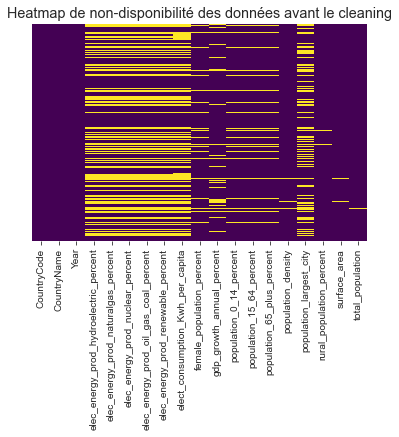

In [148]:
# Heatmap data availability before cleaning
ax = sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis').set_title("Heatmap de non-disponibilité des données avant le cleaning")
plt.savefig("heatmap_nan_before_cleaning.png", dpi=300)

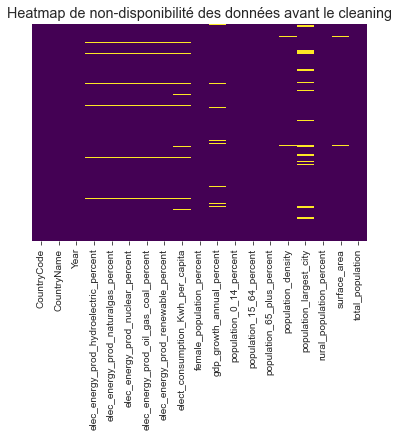

In [149]:
sns.heatmap(df_countries_filtered.isnull(),yticklabels=False,cbar=False,cmap='viridis').set_title("Heatmap de non-disponibilité des données avant le cleaning")
plt.savefig("heatmap_nan_before_cleaning.png", dpi=300)

#### Percentage of data unavailability

In [151]:
(df_countries_filtered.isna().sum(axis=0)/df.shape[0]*100) #taux de donnees manquantes pour chaque colonne

CountryCode                               0.000000
CountryName                               0.000000
Year                                      0.000000
elec_energy_prod_hydroelectric_percent    2.130898
elec_energy_prod_naturalgas_percent       2.130898
elec_energy_prod_nuclear_percent          2.130898
elec_energy_prod_oil_gas_coal_percent     2.130898
elec_energy_prod_renewable_percent        2.130898
elect_consumption_Kwh_per_capita          3.120244
female_population_percent                 0.000000
gdp_growth_annual_percent                 2.777778
population_0_14_percent                   0.000000
population_15_64_percent                  0.000000
population_65_plus_percent                0.000000
population_density                        0.437595
population_largest_city                   5.936073
rural_population_percent                  0.000000
surface_area                              0.380518
total_population                          0.057078
dtype: float64

In [ ]:
# Gestion des valeurs manquantes: On remplace les valeurs manquantes par la mediane 

countries = df["CountryName"].unique()
# Partie energie electrique 

cols_to_clean = list(df.columns)
cols_to_clean = cols_to_clean[4:]

for col_name in cols_to_clean:
  df[col_name + "_median_value"] = df.groupby(["CountryName"])[col_name].transform("median")
  df[col_name].fillna(df[col_name + "_median_value"], inplace=True)
df

On remarque que le coefficient de correlation entre population_15_64_percent et elect_access_percent_population est le plus elevé (0.701492)

In [ ]:
tw = pd.read_csv("twitter_2022.csv", sep = ';')
tw.head(5)

In [39]:
tw["start_date"] = pd.to_datetime(tw["start_date"]) 
tw

,Unnamed: 0,start_date,end_date,counts,keywords
0,0,2022-05-01 20:41:34+00:00,2022-05-01T21:00:00.000Z,85,electric cars
1,1,2022-05-01 21:00:00+00:00,2022-05-01T22:00:00.000Z,250,electric cars
2,2,2022-05-01 22:00:00+00:00,2022-05-01T23:00:00.000Z,199,electric cars
3,3,2022-05-01 23:00:00+00:00,2022-05-02T00:00:00.000Z,166,electric cars
4,4,2022-05-02 00:00:00+00:00,2022-05-02T01:00:00.000Z,154,electric cars
...,...,...,...,...,...
1685,1685,2022-05-08 16:00:00+00:00,2022-05-08T17:00:00.000Z,257,solar energy
1686,1686,2022-05-08 17:00:00+00:00,2022-05-08T18:00:00.000Z,367,solar energy
1687,1687,2022-05-08 18:00:00+00:00,2022-05-08T19:00:00.000Z,539,solar energy
1688,1688,2022-05-08 19:00:00+00:00,2022-05-08T20:00:00.000Z,378,solar energy


In [40]:
tw["end_date"] = pd.to_datetime(tw["end_date"]) 
tw

,Unnamed: 0,start_date,end_date,counts,keywords
0,0,2022-05-01 20:41:34+00:00,2022-05-01 21:00:00+00:00,85,electric cars
1,1,2022-05-01 21:00:00+00:00,2022-05-01 22:00:00+00:00,250,electric cars
2,2,2022-05-01 22:00:00+00:00,2022-05-01 23:00:00+00:00,199,electric cars
3,3,2022-05-01 23:00:00+00:00,2022-05-02 00:00:00+00:00,166,electric cars
4,4,2022-05-02 00:00:00+00:00,2022-05-02 01:00:00+00:00,154,electric cars
...,...,...,...,...,...
1685,1685,2022-05-08 16:00:00+00:00,2022-05-08 17:00:00+00:00,257,solar energy
1686,1686,2022-05-08 17:00:00+00:00,2022-05-08 18:00:00+00:00,367,solar energy
1687,1687,2022-05-08 18:00:00+00:00,2022-05-08 19:00:00+00:00,539,solar energy
1688,1688,2022-05-08 19:00:00+00:00,2022-05-08 20:00:00+00:00,378,solar energy


In [ ]:
tw.isnull().sum() # connaitre le nombre de valeurs manquantes dans chaques colonnes 

Unnamed: 0    0
start_date    0
end_date      0
counts        0
keywords      0
dtype: int64

In [41]:
tw['date'] = [d.date() for d in tw['start_date']]
tw
#tw['time'] = [d.time() for d in tw['start_date','end_date']]

,Unnamed: 0,start_date,end_date,counts,keywords,date
0,0,2022-05-01 20:41:34+00:00,2022-05-01 21:00:00+00:00,85,electric cars,2022-05-01
1,1,2022-05-01 21:00:00+00:00,2022-05-01 22:00:00+00:00,250,electric cars,2022-05-01
2,2,2022-05-01 22:00:00+00:00,2022-05-01 23:00:00+00:00,199,electric cars,2022-05-01
3,3,2022-05-01 23:00:00+00:00,2022-05-02 00:00:00+00:00,166,electric cars,2022-05-01
4,4,2022-05-02 00:00:00+00:00,2022-05-02 01:00:00+00:00,154,electric cars,2022-05-02
...,...,...,...,...,...,...
1685,1685,2022-05-08 16:00:00+00:00,2022-05-08 17:00:00+00:00,257,solar energy,2022-05-08
1686,1686,2022-05-08 17:00:00+00:00,2022-05-08 18:00:00+00:00,367,solar energy,2022-05-08
1687,1687,2022-05-08 18:00:00+00:00,2022-05-08 19:00:00+00:00,539,solar energy,2022-05-08
1688,1688,2022-05-08 19:00:00+00:00,2022-05-08 20:00:00+00:00,378,solar energy,2022-05-08


In [42]:
tw['time'] = [d.time() for d in tw['start_date']]
tw

,Unnamed: 0,start_date,end_date,counts,keywords,date,time
0,0,2022-05-01 20:41:34+00:00,2022-05-01 21:00:00+00:00,85,electric cars,2022-05-01,20:41:34
1,1,2022-05-01 21:00:00+00:00,2022-05-01 22:00:00+00:00,250,electric cars,2022-05-01,21:00:00
2,2,2022-05-01 22:00:00+00:00,2022-05-01 23:00:00+00:00,199,electric cars,2022-05-01,22:00:00
3,3,2022-05-01 23:00:00+00:00,2022-05-02 00:00:00+00:00,166,electric cars,2022-05-01,23:00:00
4,4,2022-05-02 00:00:00+00:00,2022-05-02 01:00:00+00:00,154,electric cars,2022-05-02,00:00:00
...,...,...,...,...,...,...,...
1685,1685,2022-05-08 16:00:00+00:00,2022-05-08 17:00:00+00:00,257,solar energy,2022-05-08,16:00:00
1686,1686,2022-05-08 17:00:00+00:00,2022-05-08 18:00:00+00:00,367,solar energy,2022-05-08,17:00:00
1687,1687,2022-05-08 18:00:00+00:00,2022-05-08 19:00:00+00:00,539,solar energy,2022-05-08,18:00:00
1688,1688,2022-05-08 19:00:00+00:00,2022-05-08 20:00:00+00:00,378,solar energy,2022-05-08,19:00:00


In [ ]:
tw['time1'] = [d.time() for d in tw['end_date']]
tw